In [1]:
import os
import json
import numpy as np
import pandas as pd
import librosa
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [10]:
# Load the CSV File
file_path = r"C:\Users\xuant\OneDrive\Documents\MSBA 265\python_analysis\msba265-finalstorage\data_storage\ZED.json"
ZED = pd.read_json(file_path, encoding='ISO-8859-1')
ZED.head(5)

,spk1_1,spk1_2,spk2_1,spk2_2,spk2_3,spk2_4,spk2_5,spk2_6,spk2_7,spk2_8,...,spk69_1,spk69_2,spk69_3,spk70_1,spk70_2,spk71_1,spk72_1,spk72_2,spk73_1,spk73_2
wav,datafolder/spk1_1.wav,datafolder/spk1_2.wav,datafolder/spk2_1.wav,datafolder/spk2_2.wav,datafolder/spk2_3.wav,datafolder/spk2_4.wav,datafolder/spk2_5.wav,datafolder/spk2_6.wav,datafolder/spk2_7.wav,datafolder/spk2_8.wav,...,datafolder/spk69_1.wav,datafolder/spk69_2.wav,datafolder/spk69_3.wav,datafolder/spk70_1.wav,datafolder/spk70_2.wav,datafolder/spk71_1.wav,datafolder/spk72_1.wav,datafolder/spk72_2.wav,datafolder/spk73_1.wav,datafolder/spk73_2.wav
duration,6.144,6.336,9.13,5.832,7.259,4.517,4.451,10.103,4.731,3.391,...,7.361,8.691,10.775,2.153,1.067,4.467,9.878,4.848,4.222,3.705
emotion,"[{'emo': 'angry', 'start': 3.763, 'end': 6.144}]","[{'emo': 'angry', 'start': 1.016, 'end': 6.336}]","[{'emo': 'sad', 'start': 6.422, 'end': 9.13}]","[{'emo': 'sad', 'start': 2.42, 'end': 5.832}]","[{'emo': 'angry', 'start': 2.339, 'end': 7.259}]","[{'emo': 'sad', 'start': 0.986, 'end': 4.517}]","[{'emo': 'sad', 'start': 0.0, 'end': 4.451}]","[{'emo': 'angry', 'start': 3.651, 'end': 10.103}]","[{'emo': 'angry', 'start': 1.903, 'end': 4.731}]","[{'emo': 'sad', 'start': 2.04, 'end': 3.391}]",...,"[{'emo': 'sad', 'start': 2.171, 'end': 7.361}]","[{'emo': 'sad', 'start': 2.5540000000000003, '...","[{'emo': 'sad', 'start': 0.0, 'end': 10.775}]","[{'emo': 'happy', 'start': 1.252, 'end': 2.153}]","[{'emo': 'happy', 'start': 0.0, 'end': 1.067}]","[{'emo': 'happy', 'start': 1.212, 'end': 2.62}]","[{'emo': 'happy', 'start': 7.12, 'end': 9.878}]","[{'emo': 'happy', 'start': 2.478, 'end': 4.848}]","[{'emo': 'happy', 'start': 1.7970000000000002,...","[{'emo': 'happy', 'start': 0.837, 'end': 2.435}]"
transcription,It would be readily obvious to people who serv...,including some extraordinarily stupid noisy ye...,"a girl that lived on the second floor, her ex ...",you know set the fire and intended to kill her...,I don't understand what he was thinking of but...,we've never done anything to her I've never go...,further and we'll be punished the rest of our ...,if he would've ah been in a car accident where...,all of us I mean just the emptyness the sick f...,not a day goes by that I don't do not shed a t...,...,and she had such an impact on me but when she ...,"this past year has been really difficult, like...",Chelsie was here every step of my side and she...,maybe you wanna redo that intro again,just end the video right now,"because I, I got into one of them, ok so I hav...","and have fun together, and learn an adventure ...","so she got an admission email just now, congra...",it is my pleasure to officially welcome you to...,but the only way I know how to describe is lik...


In [11]:
# Data Transformation
audio_paths, durations, audio_emotions = [], [], []
for key, value in ZED.items():
    audio_path = value['wav'].replace("datafolder/", "")
    duration = value['duration']
    for emotion_data in value['emotion']:
        audio_paths.append(audio_path)
        audio_emotions.append(emotion_data['emo'])
        durations.append(duration)

df = pd.DataFrame({
    'Audio_path': audio_paths,
    'Duration': durations,
    'Emotion': audio_emotions
})

In [12]:
# 1. Data Overview
print(df.info())
print("\nSummary statistics:")
print(df.describe())

# Check for Missing or Duplicate Values
missing_values = df.isnull().sum()
print(f"\nMissing values:\n{missing_values}")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Audio_path  180 non-null    object 
 1   Duration    180 non-null    float64
 2   Emotion     180 non-null    object 
dtypes: float64(1), object(2)
memory usage: 4.3+ KB
None

Summary statistics:
         Duration
count  180.000000
mean     5.375617
std      2.475985
min      1.067000
25%      3.658750
50%      4.829000
75%      6.403250
max     14.777000

Missing values:
Audio_path    0
Duration      0
Emotion       0
dtype: int64
Number of duplicate rows: 0


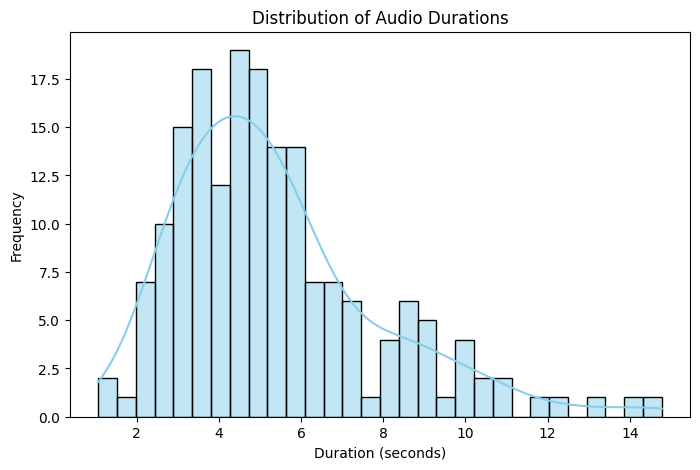

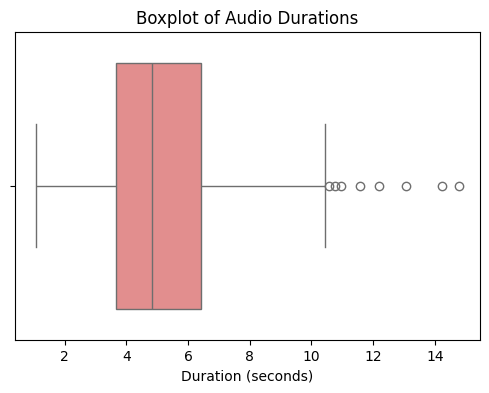

In [13]:
# 2. Duration Analysis
plt.figure(figsize=(8, 5))
sns.histplot(df['Duration'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of Audio Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Duration'], color='lightcoral')
plt.title('Boxplot of Audio Durations')
plt.xlabel('Duration (seconds)')
plt.show()

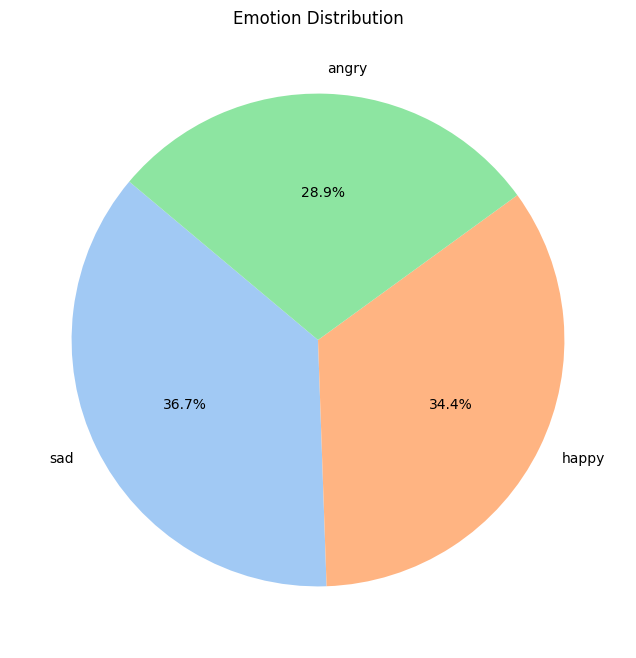

C:\Users\xuant\AppData\Local\Temp\ipykernel_18728\493110018.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Emotion', y='Duration', data=df, palette='Set2')


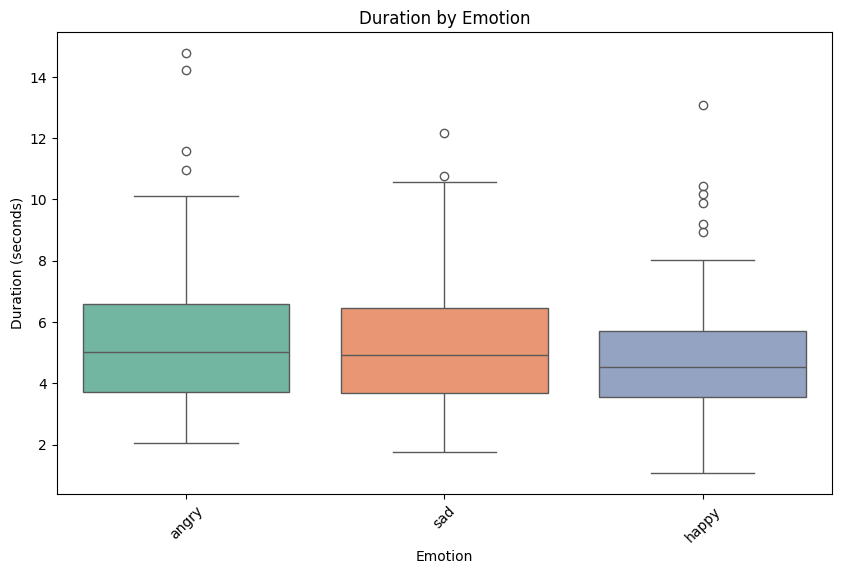

In [14]:
# 3. Emotion Distribution Analysis
plt.figure(figsize=(8, 8))
df['Emotion'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Emotion Distribution')
plt.ylabel('')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Emotion', y='Duration', data=df, palette='Set2')
plt.title('Duration by Emotion')
plt.xlabel('Emotion')
plt.ylabel('Duration (seconds)')
plt.xticks(rotation=45)
plt.show()

In [20]:
# 4. Feature Analysis
path = r"C:\Users\xuant\OneDrive\Documents\MSBA 265\python_analysis\msba265-finalstorage\data_storage\ZED"
allowed_extensions = {'.wav', '.mp3', '.flac'}

def feature_extraction(file_path):
    try:
        X, sr = librosa.load(file_path, sr=None, res_type='kaiser_fast')
        mfcc = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=50).T, axis=0)
        return mfcc
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

features = {}
error_log = []
for audio in os.listdir(path):
    if os.path.splitext(audio)[1].lower() in allowed_extensions:
        audio_path = os.path.join(path, audio)
        try:
            mfcc_features = feature_extraction(audio_path)
            if mfcc_features is not None:
                features[audio] = mfcc_features
        except Exception as e:
            error_log.append((audio, str(e)))

print(f"\nExtracted features for {len(features)} audio files.")
print(f"Number of errors encountered: {len(error_log)}")
for file, error in error_log[:5]:
    print(f"Error processing {file}: {error}")


Extracted features for 180 audio files.
Number of errors encountered: 0


In [23]:
# Feature DataFrame
if features:
    features_df = pd.DataFrame(features).T
    print("\nFeature DataFrame Head:")
    print(features_df.head())


Feature DataFrame Head:
                     0           1          2          3          4   \
spk10_1.wav -307.348663  113.017326  12.745001  19.782560  -3.249812   
spk10_2.wav -303.758545  137.761368   5.212064  15.954529  -9.554136   
spk11_1.wav -300.306793  133.846878   4.559446  10.694670 -11.114384   
spk11_2.wav -287.926056  124.875183   3.074267   3.370816  -8.611802   
spk11_3.wav -320.209198  140.287720  10.798476  -5.628775  -4.228041   

                    5          6          7         8         9   ...  \
spk10_1.wav -11.316093 -28.594299   2.221921 -6.027917 -2.927456  ...   
spk10_2.wav -12.673755 -25.676552   1.378621 -4.682007 -5.654009  ...   
spk11_1.wav -15.378218 -10.477098 -11.058848 -6.855992 -6.518062  ...   
spk11_2.wav -13.121280 -12.573774  -9.776283 -2.179861 -6.526450  ...   
spk11_3.wav  -7.777880  -6.969054 -10.768969 -3.013523 -4.066320  ...   

                   40        41        42        43        44        45  \
spk10_1.wav -4.950483 -3.516

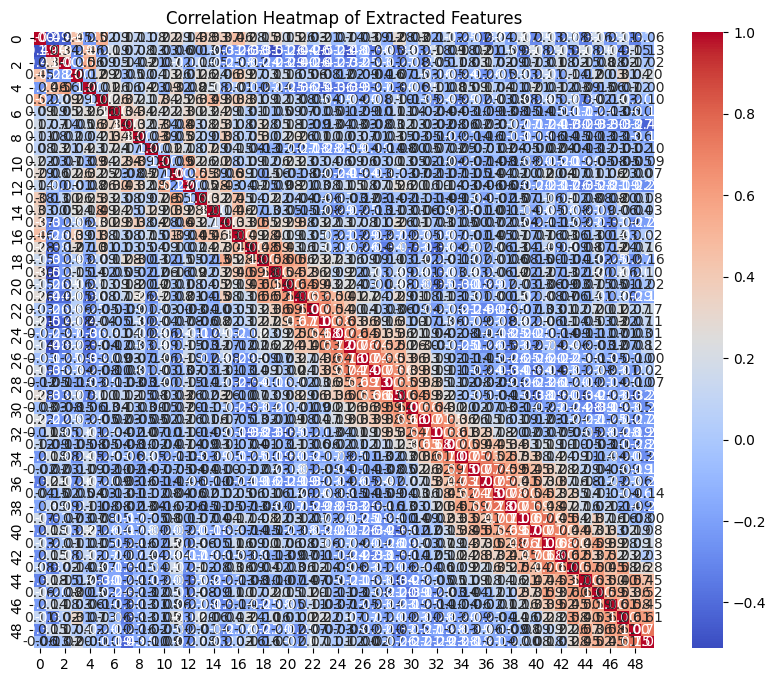

In [25]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(features_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Extracted Features')
plt.show()

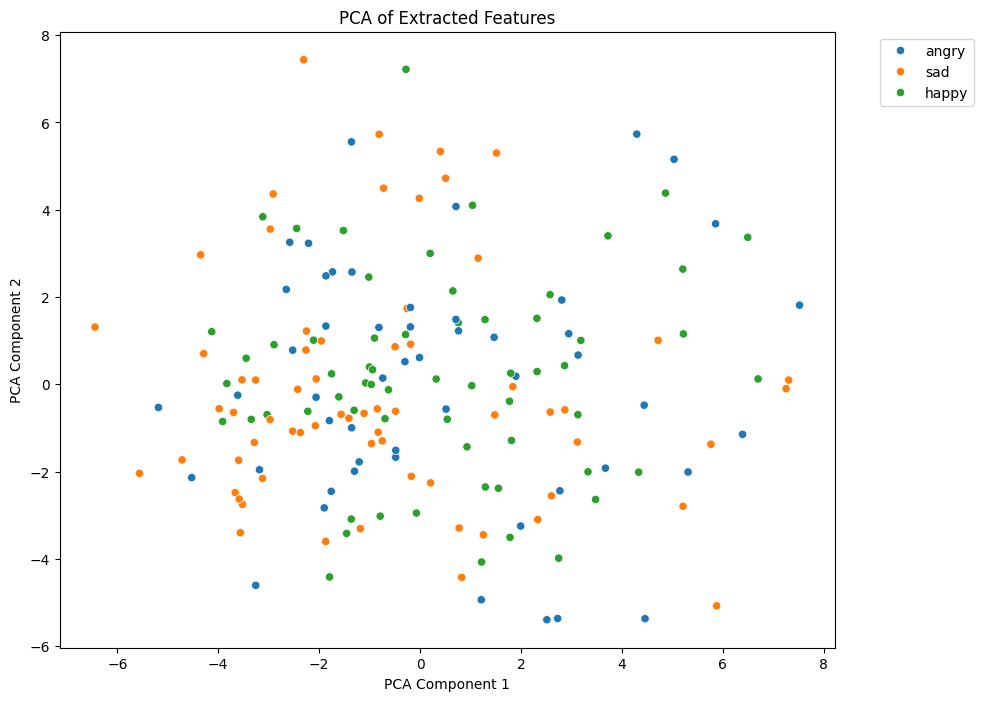

In [27]:
# PCA for Feature Reduction
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
pca_df['Emotion'] = df['Emotion'][:len(pca_df)]

plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Emotion', palette='tab10')
plt.title('PCA of Extracted Features')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()